In [85]:
# Standard imports
import numpy as np
import yaml
import matplotlib
import matplotlib.pyplot as plt
import toml
%matplotlib inline  
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 12]

In [186]:
def sortfunction(chan):
    sortdict = {
        'HF_2':1, 
        'HF_1':2, 
        'MF2_2':3, 
        'MF_2':4, 
        'MF1_2':5,
        'MF2_1':6,
        'MF_1':7,
        'MF1_1':8,
        'LF_2':9,
        'LF_1':10,
        'ULF_1':11}
    aa = sortdict[chan]
    return(aa)

def plotratios(data,telescope,xvar,yvar,xdefault,axnum):
    #vec = {'SAT':np.array([]),'SPLAT':np.array([]),'CHLAT':np.array([]) }
    #yvec = {'SAT':np.array([]),'SPLAT':np.array([]),'CHLAT':np.array([]) }

    yamlfiles = [key for key, value in data.items() if telescope.lower() in key.lower()]
    for key1 in sorted(yamlfiles):
        #print(key1)
        chlist = sorted(list(data[key1].keys()),key=sortfunction)
        for key2 in chlist:
            #print(key2)
            xvec = np.array(data[key1][key2][xvar])
            yvec = np.array(data[key1][key2][yvar])
            xdefault = data[key1][key2]['xdefault']
            default_index = np.argmin((xvec-xdefault)**2)
            dx = xvec[default_index+1]-xvec[default_index]
            dy = yvec[default_index+1]-yvec[default_index]
            xdist = xdefault - xvec[default_index]
            ydefault = yvec[default_index] + xdist*dy/dx
            yratio = yvec/ydefault
            axs[axnum].plot(xvec,yratio, label = key2)
            axs[axnum].plot([xdefault,xdefault],[0,np.max(yratio)],'--k')

    return chlist,xvec,yvec

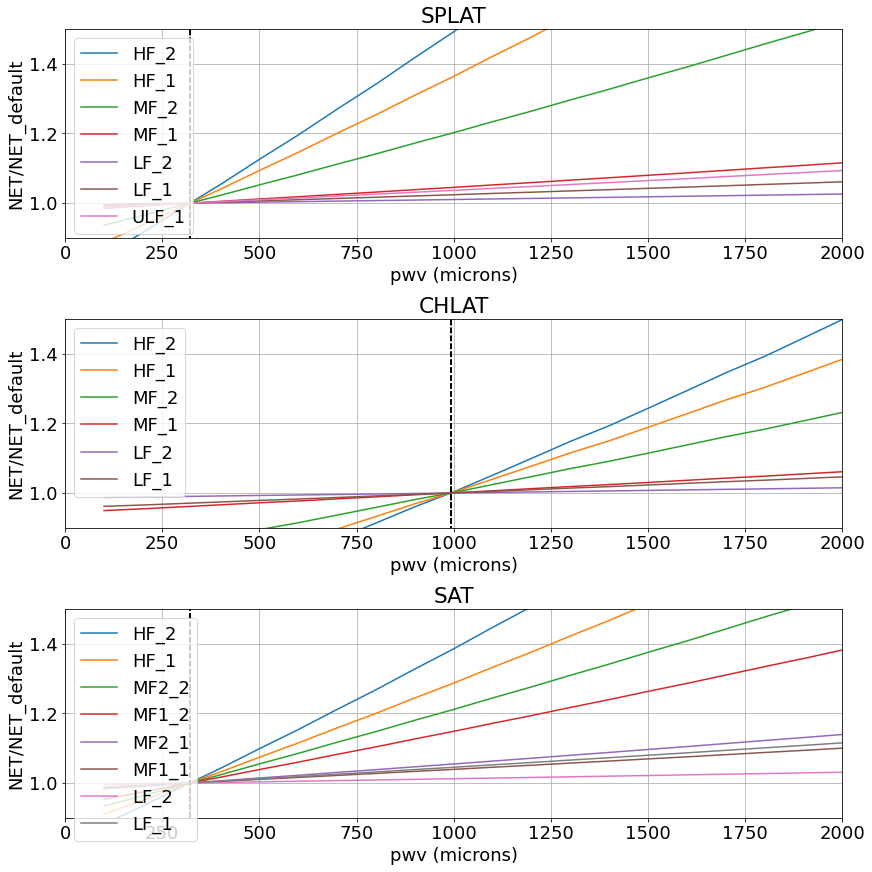

In [187]:
data = toml.load('outputs/NET_v_pwv.toml')
BaseModel = toml.load('outputs/BaseModel.toml')

def finishplot(axnum):
    axs[axnum].set_xlabel('pwv (microns)')
    axs[axnum].set_ylabel('NET/NET_default')
    axs[axnum].set_ylim(0.9,1.5)
    axs[axnum].set_xlim(0,2000)
    axs[axnum].legend(loc='upper left')
    axs[axnum].grid()

fig,axs = plt.subplots(3,1,constrained_layout=True)
telescope = 'SPLAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
#plt.subplot(3,1,1,constrained_layout=True)
plt.gca().set_prop_cycle(None)
pwv = BaseModel[yamlfile]['defaults']['pwv']
aa = plotratios(data,telescope,'pwv','NET',pwv,0)
axs[0].set_title(telescope)
finishplot(0)

telescope = 'CHLAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
pwv = BaseModel[yamlfile]['defaults']['pwv']
aa = plotratios(data,telescope,'pwv','NET',pwv,1)
axs[1].set_title(telescope)
finishplot(1)

telescope = 'SAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
pwv = BaseModel[yamlfile]['defaults']['pwv']
aa = plotratios(data,telescope,'pwv','NET',pwv,2)
axs[2].set_title(telescope)
finishplot(2)

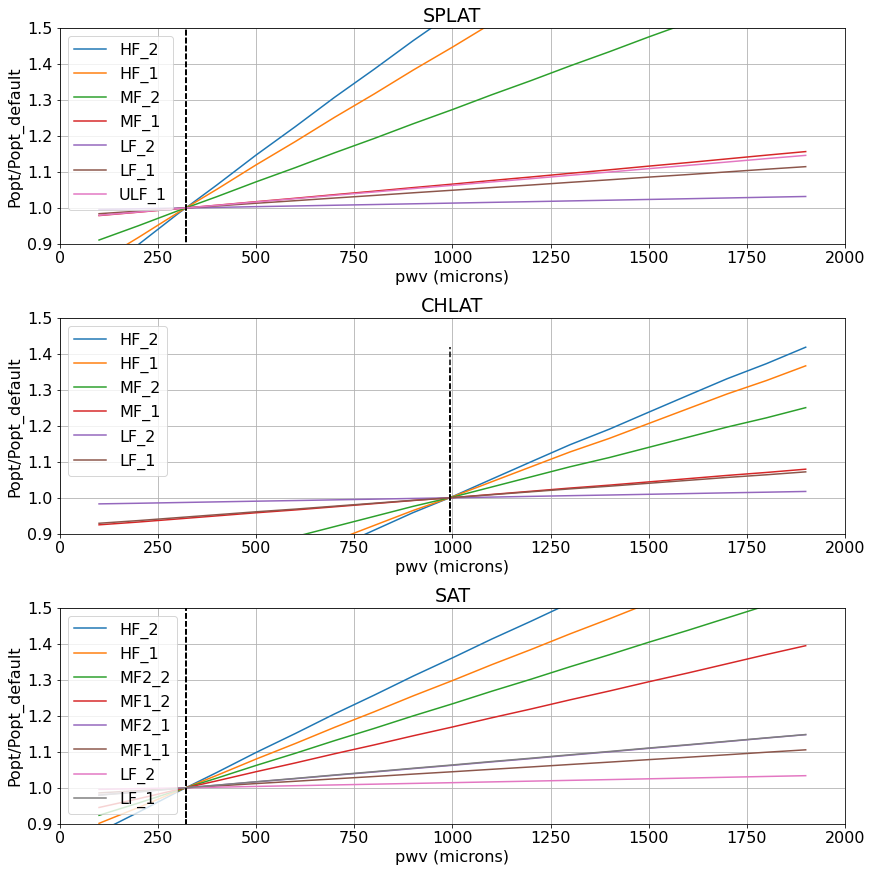

In [188]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12,12]

data = toml.load('outputs/opt_power_v_pwv.toml')
BaseModel = toml.load('outputs/BaseModel.toml')

def finishplot(axnum):
    axs[axnum].set_xlabel('pwv (microns)')
    axs[axnum].set_ylabel('Popt/Popt_default')
    axs[axnum].set_ylim(0.9,1.5)
    axs[axnum].set_xlim(0,2000)
    axs[axnum].legend(loc='upper left')
    axs[axnum].grid()

fig,axs = plt.subplots(3,1,constrained_layout=True)
telescope = 'SPLAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
#plt.subplot(3,1,1,constrained_layout=True)
plt.gca().set_prop_cycle(None)
pwv = BaseModel[yamlfile]['defaults']['pwv']
aa = plotratios(data,telescope,'pwv','opt_power',pwv,0)
axs[0].set_title(telescope)
finishplot(0)

telescope = 'CHLAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
pwv = BaseModel[yamlfile]['defaults']['pwv']
aa = plotratios(data,telescope,'pwv','opt_power',pwv,1)
axs[1].set_title(telescope)
finishplot(1)

telescope = 'SAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
pwv = BaseModel[yamlfile]['defaults']['pwv']
aa = plotratios(data,telescope,'pwv','opt_power',pwv,2)
axs[2].set_title(telescope)
finishplot(2)

# Popt vs Elevation

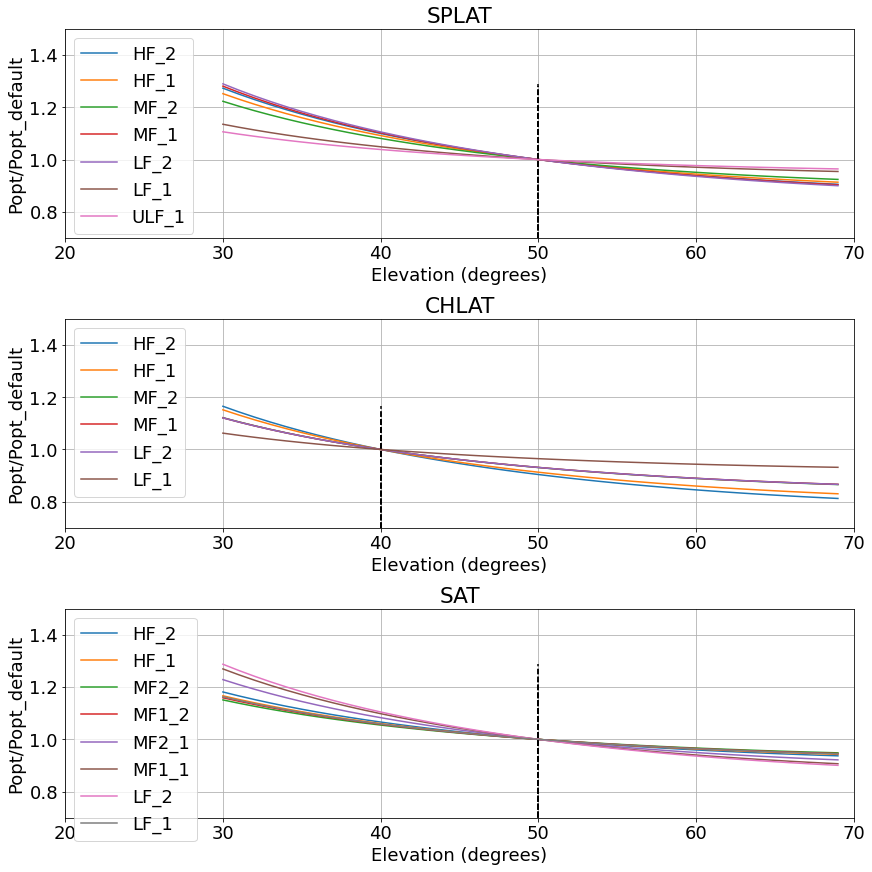

In [189]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12,12]

data = toml.load('outputs/opt_power_v_elevation.toml')
BaseModel = toml.load('outputs/BaseModel.toml')

def finishplot(axnum):
    axs[axnum].set_xlabel('Elevation (degrees)')
    axs[axnum].set_ylabel('Popt/Popt_default')
    axs[axnum].set_ylim(0.7,1.5)
    axs[axnum].set_xlim(20,70)
    axs[axnum].legend(loc='upper left')
    axs[axnum].grid()

fig,axs = plt.subplots(3,1,constrained_layout=True)
telescope = 'SPLAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
elev = BaseModel[yamlfile]['defaults']['elevation']
aa = plotratios(data,telescope,'elevation','opt_power',elev,0)
axs[0].set_title(telescope)
finishplot(0)

telescope = 'CHLAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
elev = BaseModel[yamlfile]['defaults']['elevation']
aa = plotratios(data,telescope,'elevation','opt_power',elev,1)
axs[1].set_title(telescope)
finishplot(1)

telescope = 'SAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
elev = BaseModel[yamlfile]['defaults']['elevation']
aa = plotratios(data,telescope,'elevation','opt_power',elev,2)
axs[2].set_title(telescope)
finishplot(2)

# NET vs Elevation

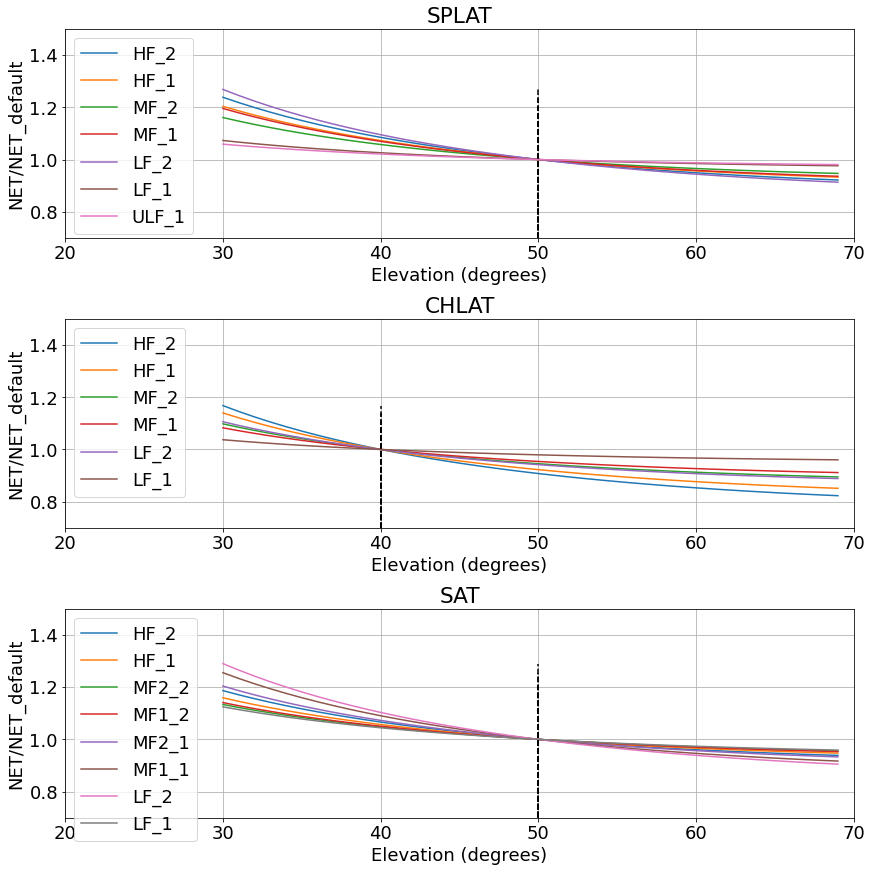

In [190]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12,12]

data = toml.load('outputs/NET_v_elevation.toml')
BaseModel = toml.load('outputs/BaseModel.toml')

def finishplot(axnum):
    axs[axnum].set_xlabel('Elevation (degrees)')
    axs[axnum].set_ylabel('NET/NET_default')
    axs[axnum].set_ylim(0.7,1.5)
    axs[axnum].set_xlim(20,70)
    axs[axnum].legend(loc='upper left')
    axs[axnum].grid()

fig,axs = plt.subplots(3,1,constrained_layout=True)
telescope = 'SPLAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
elev = BaseModel[yamlfile]['defaults']['elevation']
aa = plotratios(data,telescope,'elevation','NET',elev,0)
axs[0].set_title(telescope)
finishplot(0)

telescope = 'CHLAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
elev = BaseModel[yamlfile]['defaults']['elevation']
aa = plotratios(data,telescope,'elevation','NET',elev,1)
axs[1].set_title(telescope)
finishplot(1)

telescope = 'SAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
elev = BaseModel[yamlfile]['defaults']['elevation']
aa = plotratios(data,telescope,'elevation','NET',elev,2)
axs[2].set_title(telescope)
finishplot(2)

# NET vs 50K Alumina temperature

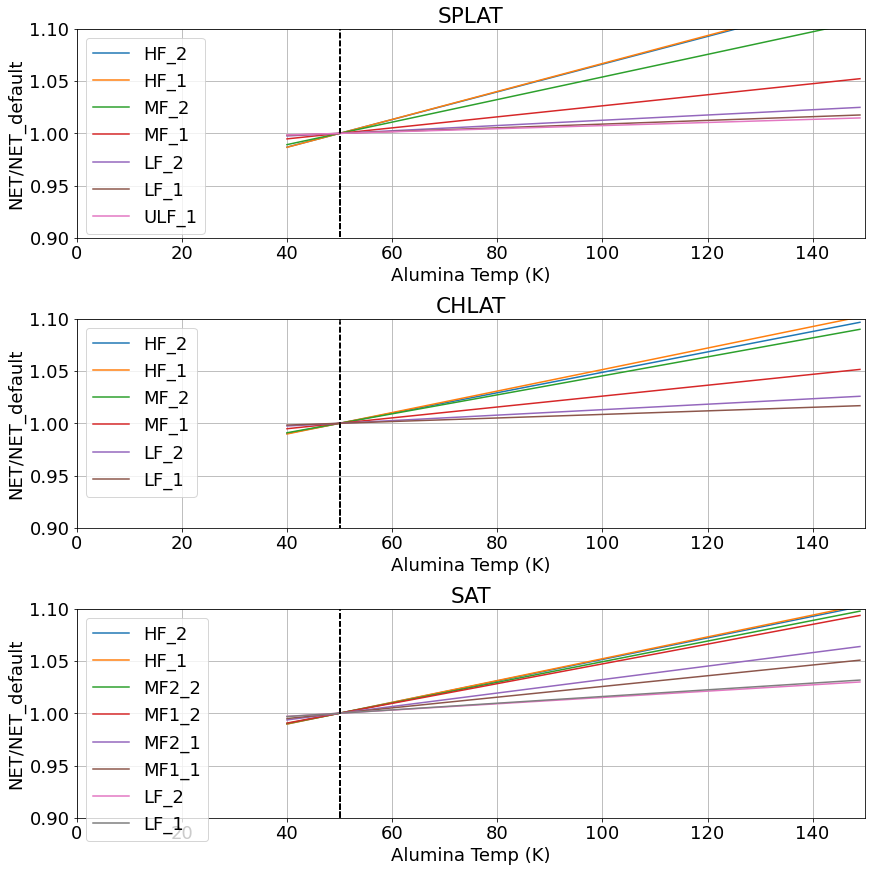

In [191]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12,12]

data = toml.load('outputs/NET_v_temperature.toml')
BaseModel = toml.load('outputs/BaseModel.toml')
T_alumina_default = 50

def finishplot(axnum):
    axs[axnum].set_xlabel('Alumina Temp (K)')
    axs[axnum].set_ylabel('NET/NET_default')
    axs[axnum].set_ylim(0.9,1.1)
    axs[axnum].set_xlim(0,150)
    axs[axnum].legend(loc='upper left')
    axs[axnum].grid()


fig,axs = plt.subplots(3,1,constrained_layout=True)
telescope = 'SPLAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,'temperature','NET',T_alumina_default,0)
axs[0].set_title(telescope)
finishplot(0)

telescope = 'CHLAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,'temperature','NET',T_alumina_default,1)
axs[1].set_title(telescope)
finishplot(1)

telescope = 'SAT'
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,'temperature','NET',T_alumina_default,2)
axs[2].set_title(telescope)
finishplot(2)

# NET vs Alumina loss tangent

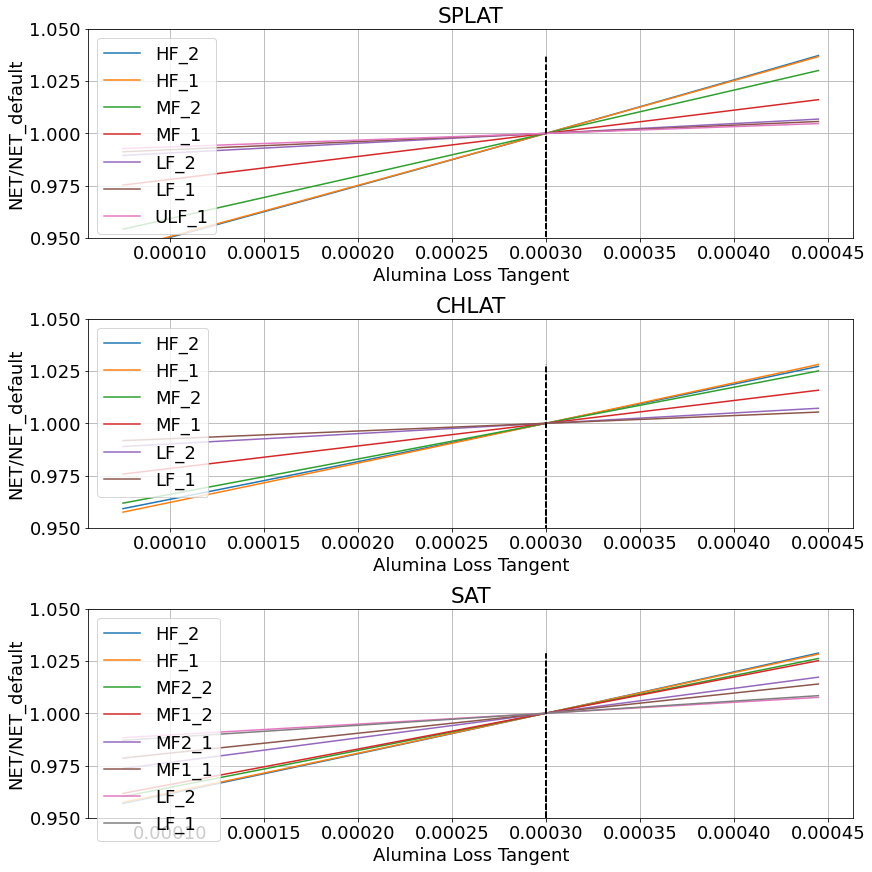

In [192]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12,12]

data = toml.load('outputs/NET_v_loss_tangent.toml')
BaseModel = toml.load('outputs/BaseModel.toml')
Alumina_tandelta_default = 3.0E-4

def finishplot(axnum):
    axs[axnum].set_xlabel('Alumina Loss Tangent')
    axs[axnum].set_ylabel('NET/NET_default')
    axs[axnum].set_ylim(0.95,1.05)
    #axs[axnum].set_xlim(0,150)
    axs[axnum].legend(loc='upper left')
    axs[axnum].grid()

xname = 'loss_tangent'
yname = 'NET'
xdefault = Alumina_tandelta_default

fig,axs = plt.subplots(3,1,constrained_layout=True)
telescope = 'SPLAT'
panelnum = 0
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

telescope = 'CHLAT'
panelnum =1
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

telescope = 'SAT'
panelnum = 2
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

In [193]:
data['CHLAT_20210714.yaml']['LF_1']['xdefault']

0.0003

# NET vs Detector efficiency

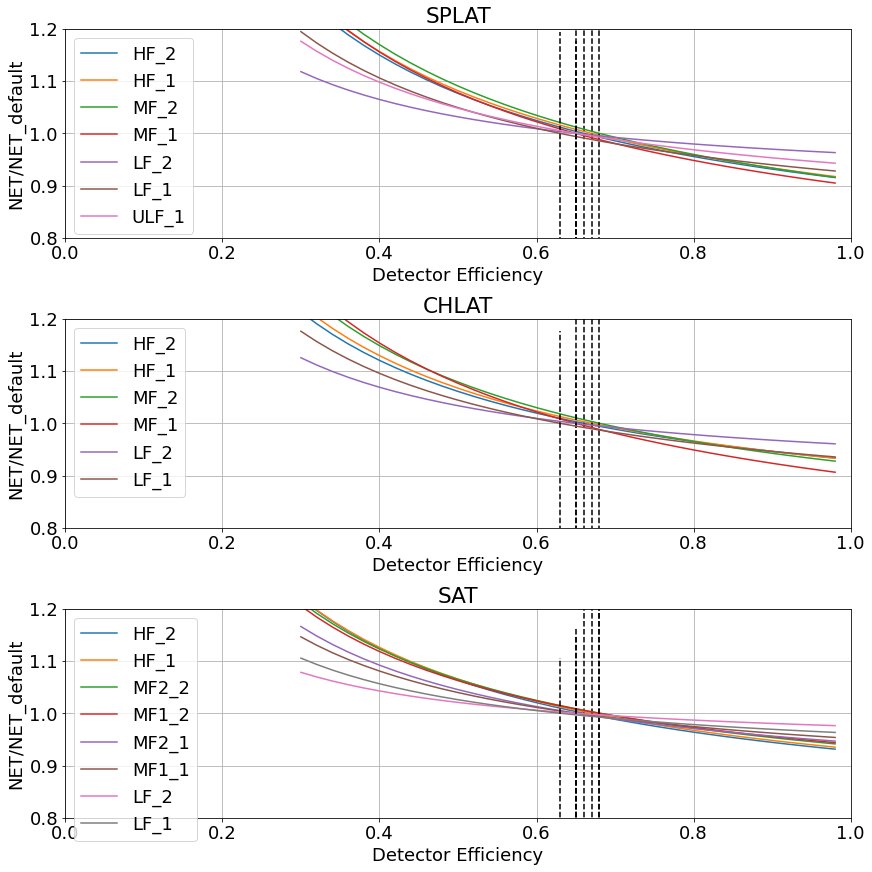

In [198]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12,12]

data = toml.load('outputs/NET_v_det_eff.toml')
BaseModel = toml.load('outputs/BaseModel.toml')
Alumina_tandelta_default = 3.0E-4

def finishplot(axnum):
    axs[axnum].set_xlabel('Detector Efficiency')
    axs[axnum].set_ylabel('NET/NET_default')
    axs[axnum].set_ylim(0.8,1.2)
    axs[axnum].set_xlim(0,1.0)
    axs[axnum].legend(loc='upper left')
    axs[axnum].grid()

xname = 'det_eff'
yname = 'NET'
xdefault = Alumina_tandelta_default

fig,axs = plt.subplots(3,1,constrained_layout=True)
telescope = 'SPLAT'
panelnum = 0
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

telescope = 'CHLAT'
panelnum =1
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

telescope = 'SAT'
panelnum = 2
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

# NET vs beta (thermal carrier index)

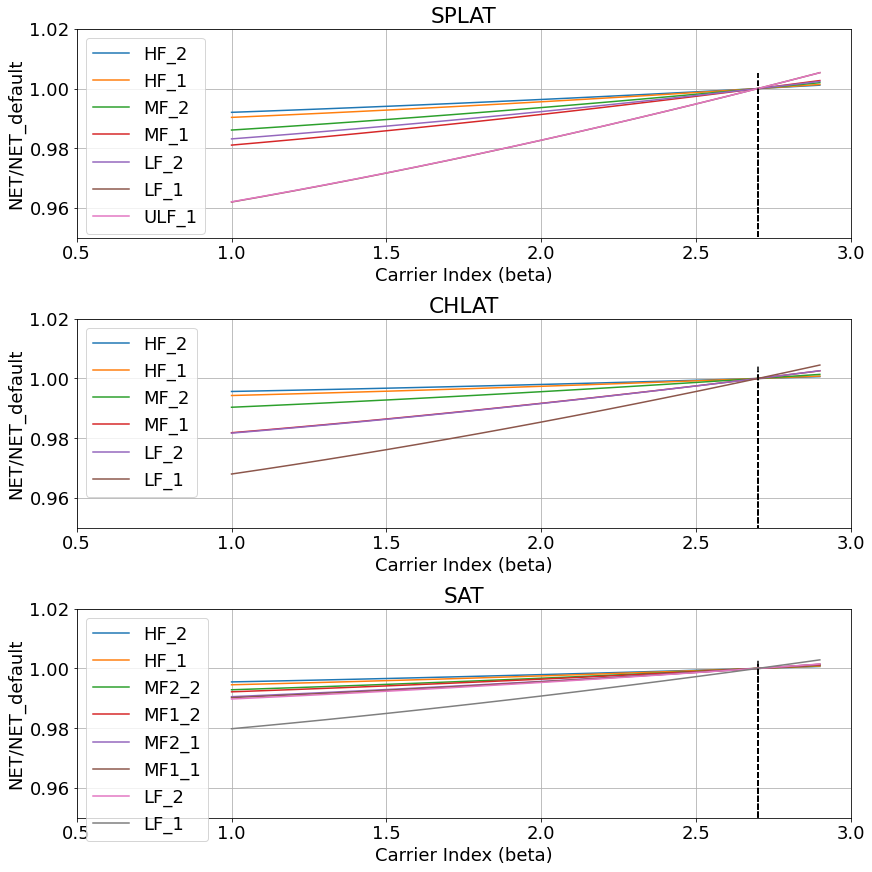

In [204]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12,12]

data = toml.load('outputs/NET_v_carrier_index.toml')
BaseModel = toml.load('outputs/BaseModel.toml')
Alumina_tandelta_default = 3.0E-4

def finishplot(axnum):
    axs[axnum].set_xlabel('Carrier Index (beta)')
    axs[axnum].set_ylabel('NET/NET_default')
    axs[axnum].set_ylim(0.95,1.02)
    axs[axnum].set_xlim(0.5,3)
    axs[axnum].legend(loc='upper left')
    axs[axnum].grid()

xname = 'carrier_index'
yname = 'NET'
xdefault = 2.7

fig,axs = plt.subplots(3,1,constrained_layout=True)
telescope = 'SPLAT'
panelnum = 0
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

telescope = 'CHLAT'
panelnum =1
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

telescope = 'SAT'
panelnum = 2
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

# NET vs Tc

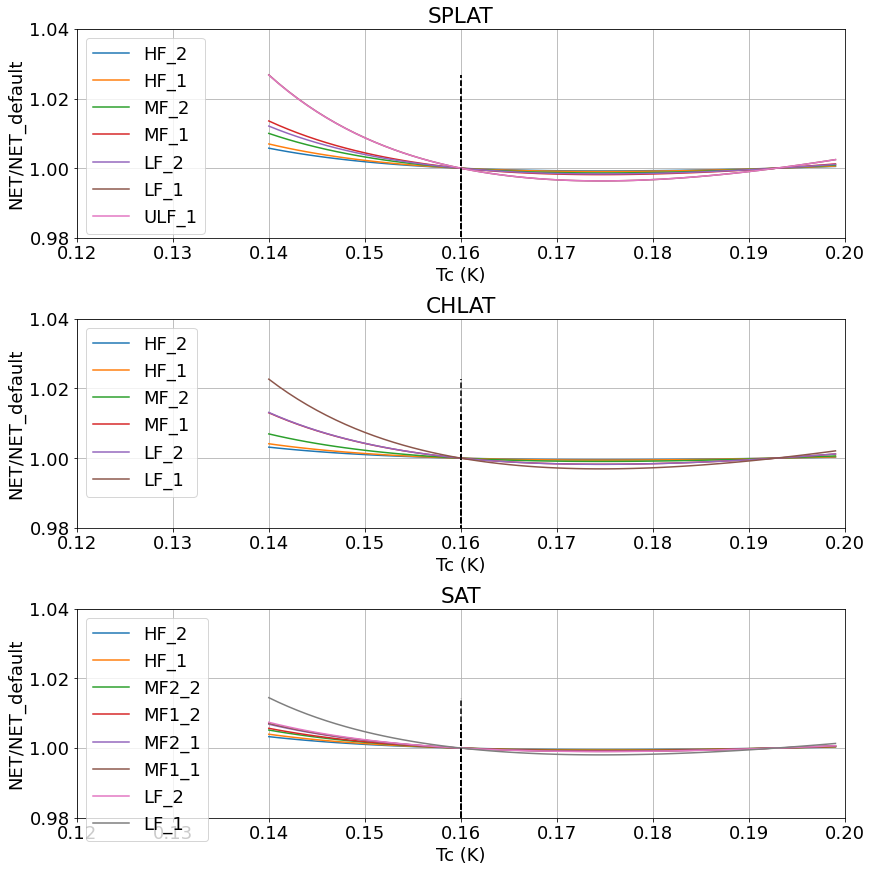

In [208]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12,12]

data = toml.load('outputs/NET_v_Tc.toml')
BaseModel = toml.load('outputs/BaseModel.toml')
Alumina_tandelta_default = 3.0E-4

def finishplot(axnum):
    axs[axnum].set_xlabel('Tc (K)')
    axs[axnum].set_ylabel('NET/NET_default')
    axs[axnum].set_ylim(0.98,1.04)
    axs[axnum].set_xlim(0.12,0.2)
    axs[axnum].legend(loc='upper left')
    axs[axnum].grid()

xname = 'Tc'
yname = 'NET'
xdefault = 2.7

fig,axs = plt.subplots(3,1,constrained_layout=True)
telescope = 'SPLAT'
panelnum = 0
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

telescope = 'CHLAT'
panelnum =1
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)

telescope = 'SAT'
panelnum = 2
yamlfile = [key for key, value in data.items() if telescope.lower() in key.lower()][0]
plt.gca().set_prop_cycle(None)
aa = plotratios(data,telescope,xname,yname,xdefault,panelnum)
axs[panelnum].set_title(telescope)
finishplot(panelnum)